#  House Prices Dataset
---
**Name:** Ronald Wanjohi Gachoka <br>
**Student Number:** S2274825 <br>
**Course:** Software Development for Data Science <br>
**Assignment:** Coursework 1 <br>
**Program:** MSc Financial Technology 

## 1. Overview

This main objective of this coursework is to perform exploratory data analysis techniques on the 2 datasets that are related to residential properties. 

The goal of this project will be:
> - To understand the factors that influence property price
> - Determine which year had the highest property 
     - Which month was the best to sell a property 
> - What type of properties were the best to own based on their sale price and neighborhood

**Methodology**
To achieve these goals, the coursework will involve the following steps:
> - Data understanding
> - Data pre-processing (cleaning)
> - Univariate and bivariate analysis to understand relationships and trends
> - Visualizations
> - Conclusion

This coursework project will follow part of the CRISP-DM methodology (Smart Vision, 2020) as it will involve the following steps:
> - Business Understanding
> - Data Understanding
> - Data Preparation
> - Data Modelling, Deployment and Evaluation (Not included in this project)


## 2. Data Understanding

The 2 datasets presented to us are from the sale of properties in a small town in USA between 2006 and 2010.

The first dataset describes individual minute elements of the residential properties from:
- lot coverage, number of bedrooms, type of foundation, zoning class amongst many more

The 2nd dataset is much smaller but describes:
- the parcel number, type of property and the price it was sold at.

**Important notes** (from data dictionary)
- To deal with some of the clear outliers, we are recommended to remove any properties with more than 4,000 square feet.

**Load libraries**

In [1]:
# Data analysis
import pandas as pd
import numpy as np

# Statistics
import scipy.stats as stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Encoding
# from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Styling
sns.set_style("whitegrid")

In [2]:
# Importing data
housing_df = pd.read_csv("data/Housing_1.txt", sep="\t")
sales_df = pd.read_csv("data/Housing_2.txt", sep="\t")

# Replacing the space in columns names with "_"
housing_df.columns = housing_df.columns.str.replace(" ","_")
sales_df.columns = sales_df.columns.str.replace(" ","_")

# quick overview
housing_df.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [3]:
sales_df.head()

,Order,PID,MS_SubClass,SalePrice
0,1,526301100,20,215000
1,2,526350040,20,105000
2,3,526351010,20,172000
3,4,526353030,20,244000
4,5,527105010,60,189900


Using `.head()` is useful as it helps quickly preview the data we have and check for any errors or unexpected values.

In the above case with housing_df we can see that there's a mixture of numerical and categorical data as well as some rows with a value of `0` which could be either missing values or a valid value.

In the case of sales_df, we can see that there's only numerical data and nothing out of the ordinary.

In [4]:
# Describe the data
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2933 non-null   int64  
 1   PID              2933 non-null   int64  
 2   MS_SubClass      2933 non-null   int64  
 3   MS_Zoning        2933 non-null   object 
 4   Lot_Frontage     2443 non-null   float64
 5   Lot_Area         2933 non-null   int64  
 6   Street           2933 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot_Shape        2933 non-null   object 
 9   Land_Contour     2933 non-null   object 
 10  Utilities        2933 non-null   object 
 11  Lot_Config       2933 non-null   object 
 12  Land_Slope       2933 non-null   object 
 13  Neighborhood     2933 non-null   object 
 14  Condition_1      2933 non-null   object 
 15  Condition_2      2933 non-null   object 
 16  Bldg_Type        2933 non-null   object 
 17  House_Style   

In [5]:
# Describe the data
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2933 entries, 0 to 2932
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Order        2933 non-null   int64
 1   PID          2933 non-null   int64
 2   MS_SubClass  2933 non-null   int64
 3   SalePrice    2933 non-null   int64
dtypes: int64(4)
memory usage: 91.8 KB


From the above lines of code, we see that:
- several columns have multiple missing values in the housing_df dataset
- some columns have the wrong data type
- there are no missing values in the sales_df dataset

In [6]:
# Shape of the data
print("Shape of the housing dataset:")
housing_df.shape

Shape of the housing dataset:


(2933, 81)

In [7]:
print("Shape of the sales_df dataset:")
sales_df.shape

Shape of the sales_df dataset:


(2933, 4)

From the above lines of code, we see that: 
- housing_df has 2933 rows and 81 columns
- sales_df has 2933 rows and 4 columns

In [8]:
# Summary statistics (numerical columns)
housing_df.describe()

,Order,PID,MS_SubClass,Lot_Frontage,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,...,Garage_Area,Wood_Deck_SF,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold
count,2933.000000,2.933000e+03,2933.000000,2443.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2910.000000,...,2932.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,1464.151381,7.142811e+08,57.349131,69.237822,10147.789976,6.094102,5.562564,1971.344016,1984.241050,102.082818,...,472.749659,93.655984,47.501534,22.988067,2.589840,16.088987,2.241050,50.583362,6.270031,2007.792704
std,846.579702,1.887213e+08,42.632965,23.354888,7876.008408,1.410595,1.111114,30.232331,20.864849,179.172166,...,214.957946,126.332461,67.457316,64.110459,25.128602,56.171408,35.579037,566.056789,3.570864,1.317834
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,731.000000,5.284770e+08,20.000000,58.000000,7441.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1464.000000,5.354532e+08,50.000000,68.000000,9439.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2197.000000,9.071811e+08,70.000000,80.000000,11553.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,120.000000,2010.000000


In [9]:
# Summary statistics (categorical columns)
housing_df.describe(include="object")

,MS_Zoning,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,...,Garage_Type,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Pool_QC,Fence,Misc_Feature,Sale_Type,Sale_Condition
count,2933,2933,198,2933,2933,2933,2933,2933,2933,2933,...,2776,2774,2774,2774,2933,13,573,106,2933,2933
unique,7,2,2,4,4,3,5,3,28,9,...,6,3,5,5,3,4,4,5,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2276,2921,120,1861,2636,2930,2143,2792,446,2524,...,1734,1233,2618,2668,2655,4,330,95,2539,2416


From the above summary statistics we can derive lots of useful information from this dataset (both numerical and categorical columns) such as:
- The maximum Order number is 2930 while we have 2933 rows, check for duplicates
- Lot area has a maximum value of 215,245 while the average is 10,000. Check for outliers 
- The oldest house in the dataset was built in 1872, it would be interesting to see how much this was sold for
- The largest property has 8 bedrooms, identify which property this is and possibly its sale price compared to rest
- 
- Within the categorical columns, we can see the number of unique values each column had as well as how many times the most frequent value appeared
    - This will be useful in identifying the most popular values within the dataset
    - We can also see the number of missing values within each column

In [10]:
# Summary statistics
sales_df.describe()

,Order,PID,MS_SubClass,SalePrice
count,2933.000000,2.933000e+03,2933.000000,2933.000000
mean,1464.151381,7.142811e+08,57.349131,180759.629731
std,846.579702,1.887213e+08,42.632965,79858.300395
min,1.000000,5.263011e+08,20.000000,12789.000000
25%,731.000000,5.284770e+08,20.000000,129500.000000
50%,1464.000000,5.354532e+08,50.000000,160000.000000
75%,2197.000000,9.071811e+08,70.000000,213500.000000
max,2930.000000,1.007100e+09,190.000000,755000.000000


Similar to the Housing_df, we can draw similar insights for Order, PID and MS_Subclass but we will confirm if all the output in both dataframes are identical later on.
Based of the sales_df summary statistics we can see that:
- There is also a discrepancy between the Order numbers and maximum value
- The average sale price is 180,000 while the max is 755,000 -> This could be an outlier, do more research

### Data Dictionary

The data dictionary is a useful tool to help us understand the data and the meaning of each column. This will help us understand the data better and help us identify any potential issues with the data.

In [11]:
# Identifying all object columns in the housing_df
for name, label in housing_df.items():
    if pd.api.types.is_object_dtype(label):
        print(name)

MS_Zoning
Street
Alley
Lot_Shape
Land_Contour
Utilities
Lot_Config
Land_Slope
Neighborhood
Condition_1
Condition_2
Bldg_Type
House_Style
Roof_Style
Roof_Matl
Exterior_1st
Exterior_2nd
Mas_Vnr_Type
Exter_Qual
Exter_Cond
Foundation
Bsmt_Qual
Bsmt_Cond
Bsmt_Exposure
BsmtFin_Type_1
BsmtFin_Type_2
Heating
Heating_QC
Central_Air
Electrical
Kitchen_Qual
Functional
Fireplace_Qu
Garage_Type
Garage_Finish
Garage_Qual
Garage_Cond
Paved_Drive
Pool_QC
Fence
Misc_Feature
Sale_Type
Sale_Condition


From the above code, we can see that there are no object type columns in the dataset. From our analysis we'll need to change the following column to object type:
- MS_SubClass

In [12]:
# identifying all numeric columns in the housing_df
for name, label in housing_df.items():
    if pd.api.types.is_numeric_dtype(label):
        print(name)

Order
PID
MS_SubClass
Lot_Frontage
Lot_Area
Overall_Qual
Overall_Cond
Year_Built
Year_Remod/Add
Mas_Vnr_Area
BsmtFin_SF_1
BsmtFin_SF_2
Bsmt_Unf_SF
Total_Bsmt_SF
1st_Flr_SF
2nd_Flr_SF
Low_Qual_Fin_SF
Gr_Liv_Area
Bsmt_Full_Bath
Bsmt_Half_Bath
Full_Bath
Half_Bath
Bedroom_AbvGr
Kitchen_AbvGr
TotRms_AbvGrd
Fireplaces
Garage_Yr_Blt
Garage_Cars
Garage_Area
Wood_Deck_SF
Open_Porch_SF
Enclosed_Porch
3Ssn_Porch
Screen_Porch
Pool_Area
Misc_Val
Mo_Sold
Yr_Sold


In [13]:
# Identifying all object columns in the sales_df
for name, label in sales_df.items():
    if pd.api.types.is_object_dtype(label):
        print(name)

From the above code, we can see that there are no object(categorical) type columns in the dataset. From our analysis we'll need to change the following column to object type:

In [14]:
# identifying all numeric columns in the sales_df
for name, label in sales_df.items():
    if pd.api.types.is_numeric_dtype(label):
        print(name)

Order
PID
MS_SubClass
SalePrice


Based of the code above, we can make the following conclusions about the variables we have in our dataset


|  **Variable**  |  **Description**  | **Type** | **Subtype** | 
|:--------------:|:-----------------:|:--------:|:-----------:|
| Order | Observation Number | Numerical |  Discrete   |
| PID | Parcel Identification Number | Numerical |   Nominal   |
| MS_SubClass | Identifies the type of dwelling involved in the sale | Numerical |   Nominal   |
| MS_Zoning | Identifies the general zoning classification of the sale | Categorical |   Nominal   |
| Lot_Frontage | Linear feet of street connected to property | Numerical | Continuous  |
| Lot_Area | Lot size in square feet | Numerical | Continuous  |
| Street | Type of road access to property | Categorical |   Nominal   |




## 3. Data Preparation

This stage will include:
- Initial Data cleaning (checking for duplicates)
- Merging the 2 datasets
- Data cleaning
    - Checking for missing values, outliers, duplicates
- Data transformation
    - Adjusting data types
    - Creating new columns from existing ones
    - Dropping columns that aren't crucial

### 3.1 Initial Data Cleaning

This stage will check for duplicates in both dataframes and remove them if they exist before merging the 2 datasets.

In [15]:
# Housing_df duplicates
housing_df[housing_df.duplicated(keep=False)].sort_values(by="Order")

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Screen_Porch,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition
145,146,535175070,20,RL,73.0,9300,Pave,NaN,Reg,Lvl,...,143,0,NaN,NaN,NaN,0,4,2010,WD,Normal
148,146,535175070,20,RL,73.0,9300,Pave,NaN,Reg,Lvl,...,143,0,NaN,NaN,NaN,0,4,2010,WD,Normal
146,147,535175180,20,RL,87.0,10725,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
149,147,535175180,20,RL,87.0,10725,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
147,148,535179020,20,RL,80.0,10032,Pave,NaN,Reg,Lvl,...,160,0,NaN,GdWo,NaN,0,6,2010,WD,Normal
150,148,535179020,20,RL,80.0,10032,Pave,NaN,Reg,Lvl,...,160,0,NaN,GdWo,NaN,0,6,2010,WD,Normal


From the above code, we can see that there are 3 duplicates in the housing_df dataset. We will remove these duplicates before merging the 2 datasets.

In [16]:
# Dropping duplicates
housing_df.drop_duplicates(inplace=True)

# Checking if we have any duplicates
housing_df.duplicated().sum()

0

In [17]:
# Sales_df duplicates
sales_df[sales_df.duplicated(keep=False)].sort_values(by="Order")

,Order,PID,MS_SubClass,SalePrice
145,146,535175070,20,167500
148,146,535175070,20,167500
146,147,535175180,20,108538
149,147,535175180,20,108538
147,148,535179020,20,159500
150,148,535179020,20,159500


In [18]:
# Dropping duplicates
sales_df.drop_duplicates(inplace=True)

# Checking if we have any duplicates
sales_df.duplicated().sum()

0

Similarly,we can see that there were 3 duplicates in the sales_df dataset. We will remove these duplicates before merging the 2 datasets.

### 3.2 Merging the 2 datasets

Before merging the dataframes, we need to ensure that we have matching PID and MS SubClass in both dataframes

In [19]:
# Comparing whether the PID values and MS Subclass are identical in both df

equal_pid = housing_df["PID"].isin(sales_df["PID"]).all()
equal_subclass = housing_df["MS_SubClass"].isin(sales_df["MS_SubClass"]).all()

if equal_pid and equal_subclass:
    print("Both PID and MS SubClass are identical in both df")
else:
    print("They aren't identical. Perform further analysis")

Both PID and MS SubClass are identical in both df


In [20]:
# Merging both the housing and sales dataframes
df = housing_df.merge(sales_df, on=["PID","MS_SubClass","Order"],
                      how="inner")
df.head()

,Order,PID,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,...,Pool_Area,Pool_QC,Fence,Misc_Feature,Misc_Val,Mo_Sold,Yr_Sold,Sale_Type,Sale_Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [21]:
# Checking the length of the dataframes
print(f"Length of the housing_df is: {len(housing_df)}")
print(f"Length of the sales_df is: {len(sales_df)}")
print(f"Length of the merged df is: {len(df)}")

Length of the housing_df is: 2930
Length of the sales_df is: 2930
Length of the merged df is: 2930


### 3.3 Checking for missing values

This stage will check for missing values in the merged dataframe and deal with them accordingly.

In [22]:
# Total number of NA values
print("Total number of missing values in the dataframe:")
df.isna().sum().sum()

Total number of missing values in the dataframe:


15749

We will deal with the missing values in different ways depending on the column:
1. Either drop the NA values
2. Impute the missing values
3. Do nothing to them if they are valid values

In [23]:
# Columns with na values
nan_columns = df.columns[df.isna().any()].tolist()

# Sum of the na values in the dataset
nan_values = df[nan_columns].isna().sum()

# Percentage of na values
nan_percentage = (nan_values / len(df)) * 100

# Creating a dataframe to display the results
nan_df = pd.DataFrame({"Missing values": nan_values,
                       "Percentage of missing values": nan_percentage})

# Sorting the dataframe
nan_df.sort_values(by="Percentage of missing values", ascending=False, inplace=True)
nan_df

,Missing values,Percentage of missing values
Pool_QC,2917,99.556314
Misc_Feature,2824,96.382253
Alley,2732,93.242321
Fence,2358,80.477816
Mas_Vnr_Type,1775,60.580205
Fireplace_Qu,1422,48.532423
Lot_Frontage,490,16.723549
Garage_Cond,159,5.426621
Garage_Qual,159,5.426621
Garage_Finish,159,5.426621


Looking at the above dataframe, we can see the amount of NA values in the dataset as well as its proportion to the whole dataset. 
For this project, we will drop all columns with **more than 10% of missing values**. This is because we have a large dataset and imputing over them will cause a lot of noise in the data.

In addition, dropping them makes sense over imputing them as some columns such as `Pool_QC` and `Misc_Feature` have more than 90% of missing values. Looking at the data dictionary we see that "NA" means that the property doesn't have the feature or pool. Therefore, we can safely assume that the missing values are valid and we can drop them.

#### 3.3.1 Dropping columns with more than 10% of NA values


In [24]:
# Dropping columns with more than 10% of NA values
# Columns to drop
columns_to_drop = nan_df[nan_df["Percentage of missing values"] > 10].index.tolist()
print(columns_to_drop)

# Drop columns
housing_df.drop(columns=columns_to_drop, inplace=True)

print(f"Number of columns in the dataset was: {len(housing_df.columns) + len(columns_to_drop)}")
print(f"Number of columns to drop is: {len(columns_to_drop)}")
print(f"Number of columns in the updated dataset is: {len(housing_df.columns)}")

['Pool_QC', 'Misc_Feature', 'Alley', 'Fence', 'Mas_Vnr_Type', 'Fireplace_Qu', 'Lot_Frontage']
Number of columns in the dataset was: 81
Number of columns to drop is: 7
Number of columns in the updated dataset is: 74


In [25]:
# Update nan_df 
nan_df = nan_df[~nan_df.index.isin(columns_to_drop)]

# Updating the original df
df = df.drop(columns=columns_to_drop)

# Checking the shape of the df
df.shape

(2930, 75)

Looking at the shape of the original df, we can see that the number of columns has dropped from 81 to 75. This is because we dropped the columns that had more than 10% of missing values.

#### 3.3.2 Columns to leave as they are

he first set of missing values we will deal with are columns that are correctly labelled as NA.
How we identified columns labeled as NA, is by going through the data dictionary provided and seeing if any columns were meant to have an NA value (eg. If property doesn't have a pool, the value associated with it in the dictionary is NA).

In [26]:
# Correctly labelled NA values
correct_na_cols = ["Bsmt_Qual","Bsmt_Cond","Bsmt_Exposure","BsmtFin_Type_1",
            "BsmtFin_Type_2","Garage_Type","Garage_Finish","Garage_Qual",
            "Garage_Cond"]

# Remove the columns from the nan_df
nan_df = nan_df[~nan_df.index.isin(correct_na_cols)]

# View the updated df
nan_df


,Missing values,Percentage of missing values
Garage_Yr_Blt,159,5.426621
Mas_Vnr_Area,23,0.784983
Bsmt_Half_Bath,2,0.068259
Bsmt_Full_Bath,2,0.068259
BsmtFin_SF_1,1,0.034130
Garage_Cars,1,0.034130
Garage_Area,1,0.034130
Total_Bsmt_SF,1,0.034130
Bsmt_Unf_SF,1,0.034130
BsmtFin_SF_2,1,0.034130


Based of the updated dataframe, we can see that the columns above consist of values that can now be imputed with the (assumed) correct values.
The 2 main imputation methods we will use will be either:
1. Mean
2. Median

#### 3.3.3 Imputing missing values

Kumar (2023) gives us a guide on which method to use for imputing missing values depending on the type of data we have.
- **Mean Imputation**  is used for continuous data that is normally distributed
- **Median Imputation** is used for continuous data that is skewed as it is less sensitive to outliers
- **Mode Imputation** is used for categorical data


In [27]:
# Median Imputation
median_cols = ["Garage_Yr_Blt", "Bsmt_Full_Bath", "Bsmt_Half_Bath", "Garage_Cars"]

for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)

df[median_cols].isna().sum()

Garage_Yr_Blt     0
Bsmt_Full_Bath    0
Bsmt_Half_Bath    0
Garage_Cars       0
dtype: int64

From the above output we can see that the missing values in the columns have been imputed with the median values and we no longer have missing values present.

We chose to use median imputation for these columns as for e.g.the "Garage_Yr_Blt" column, it made most sense to fill it with a year that was within the dataset rather than a year that was not present in the dataset (mean year which can be e.g. 2000.5 or 2000.2).

That was the same reasoning used for the selection of the other columns as they were discrete and we would expect similar discrete values to be present in the dataset after imputation.

In [28]:
# Mean Imputation
mean_cols = ["Mas_Vnr_Area","BsmtFin_SF_1", "BsmtFin_SF_2", "Bsmt_Unf_SF",
             "Total_Bsmt_SF", "Garage_Area"]

for col in mean_cols:
    df[col].fillna(df[col].mean(), inplace=True)

df[mean_cols].isna().sum()

Mas_Vnr_Area     0
BsmtFin_SF_1     0
BsmtFin_SF_2     0
Bsmt_Unf_SF      0
Total_Bsmt_SF    0
Garage_Area      0
dtype: int64

From the above output we can see that the missing values in the columns have been imputed with the mean values and we no longer have NA values present.
We decided to use mean imputation for these columns as they were continuous (this  and we would expect similar continuous values to be present in the dataset after imputation.

### 3.4. Data Transformation

This stage of the project will look at:
- Creating new columns from the already existing ones
- Dropping columns that aren't needed
- Selecting columns that are needed for our analysis

#### 3.4.1 Creating new columns

We will create a new column to help us understand the age of the property at the time of its sale. This will help us understand if the age of the property has any effect on the price of the property.

In [30]:
df["House_Sale_Age"] = df["Yr_Sold"] - df["Year_Built"]
df["House_Sale_Age"].head()

0    50
1    49
2    52
3    42
4    13
Name: House_Sale_Age, dtype: int64

#### 3.4.2 Dropping Columns

The first set of columns we will drop are columns that will add little to no value in our analysis. Typically in an analysis, one would drop columns that are highly correlated to your target variable, however in this case we will opt to drop columns that have a low correlation to the target variable.

This is because we are trying to understand the factors that influence the price of a property and columns with low correlation do not provide much insight to the target variable. Therefore, we will drop columns that have a low correlation to the target variable. 

Due to the size of the dataframe,we will drop perform correlation analysis in batches of 10 columns at a time.

We will drop columns that have a correlation of less than 0.4 to the target variable or greater than -0.4.

The choice of 0.4 is because in statistics, a correlation of less 0.4 is considered weak.

In [85]:
# Copy of df
df_new = df.copy()

# correlation cut off
corr_cutoff = 0.4

In [86]:
# Numerical columns
numerical_cols = df_new.select_dtypes(include=["int64","float64"]).iloc[:,:20]

# Add sale price to the dataframe
numerical_cols["SalePrice"] = df_new["SalePrice"]

numerical_cols.head()

,Order,PID,MS_SubClass,Lot_Area,Overall_Qual,Overall_Cond,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,...,Bsmt_Unf_SF,Total_Bsmt_SF,1st_Flr_SF,2nd_Flr_SF,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,SalePrice
0,1,526301100,20,31770,6,5,1960,1960,112.0,639.0,...,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,215000
1,2,526350040,20,11622,5,6,1961,1961,0.0,468.0,...,270.0,882.0,896,0,0,896,0.0,0.0,1,105000
2,3,526351010,20,14267,6,6,1958,1958,108.0,923.0,...,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,172000
3,4,526353030,20,11160,7,5,1968,1968,0.0,1065.0,...,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,244000
4,5,527105010,60,13830,5,5,1997,1998,0.0,791.0,...,137.0,928.0,928,701,0,1629,0.0,0.0,2,189900


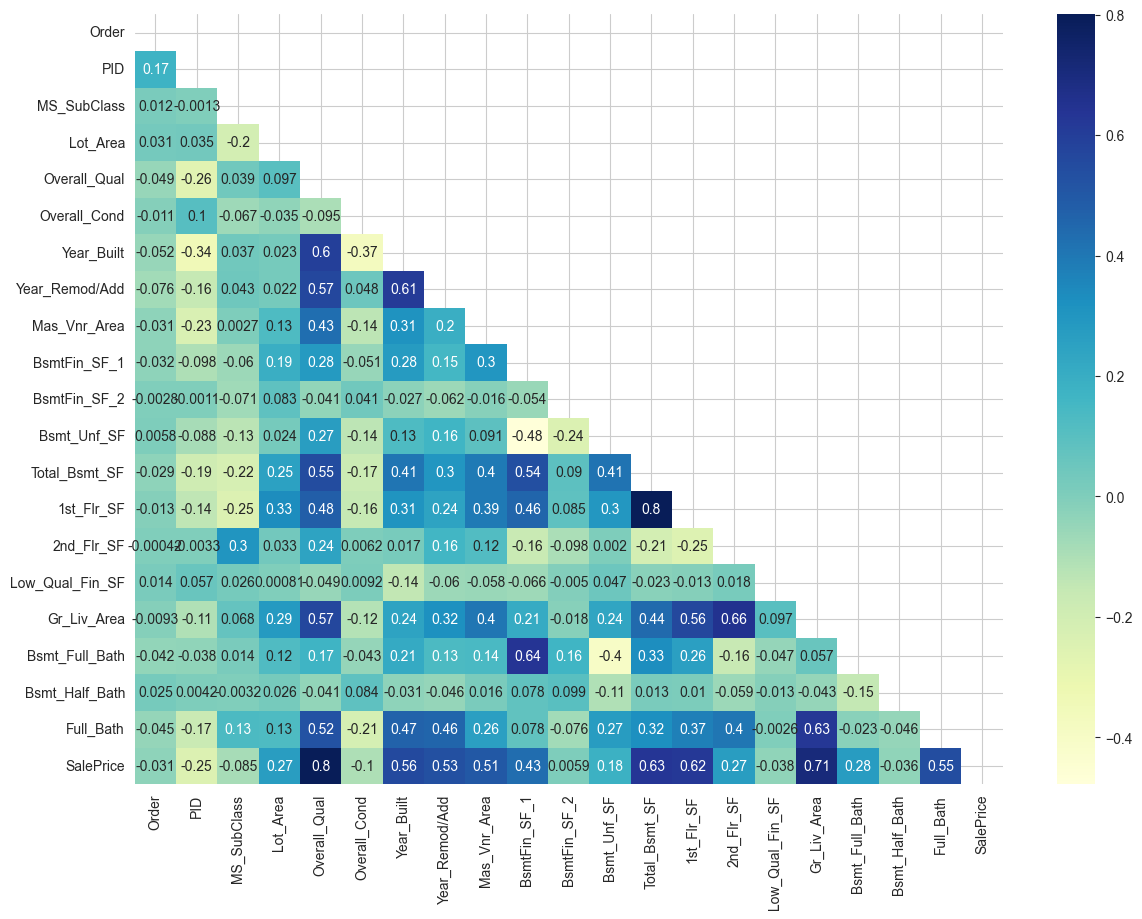

In [87]:
# Correlation matrix

corr_matrix = numerical_cols.corr()

mask = np.triu(np.ones_like(corr_matrix))

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, 
            annot=True, 
            mask=mask, 
            cmap="YlGnBu");

In [88]:
# Dropping columns with a correlation of less than 0.4

columns_to_drop = corr_matrix[abs(corr_matrix["SalePrice"]) < corr_cutoff].index.tolist()
print("Columns to drop:")
print(columns_to_drop)

# Drop columns
numerical_cols.drop(columns=columns_to_drop, inplace=True)

numerical_cols.head()

Columns to drop:
['Order', 'PID', 'MS_SubClass', 'Lot_Area', 'Overall_Cond', 'BsmtFin_SF_2', 'Bsmt_Unf_SF', '2nd_Flr_SF', 'Low_Qual_Fin_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath']


,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,Total_Bsmt_SF,1st_Flr_SF,Gr_Liv_Area,Full_Bath,SalePrice
0,6,1960,1960,112.0,639.0,1080.0,1656,1656,1,215000
1,5,1961,1961,0.0,468.0,882.0,896,896,1,105000
2,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,172000
3,7,1968,1968,0.0,1065.0,2110.0,2110,2110,2,244000
4,5,1997,1998,0.0,791.0,928.0,928,1629,2,189900


In [89]:
# Checking the remaining numerical columns
numerical_cols_1 = df_new.select_dtypes(include=["int64","float64"]).iloc[:,15:]

# Add sale price to the dataframe
numerical_cols_1["SalePrice"] = df_new["SalePrice"]

numerical_cols_1.head()

,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,...,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,SalePrice,House_Sale_Age
0,0,1656,1.0,0.0,1,0,3,1,7,2,...,62,0,0,0,0,0,5,2010,215000,50
1,0,896,0.0,0.0,1,0,2,1,5,0,...,0,0,0,120,0,0,6,2010,105000,49
2,0,1329,0.0,0.0,1,1,3,1,6,0,...,36,0,0,0,0,12500,6,2010,172000,52
3,0,2110,1.0,0.0,2,1,3,1,8,2,...,0,0,0,0,0,0,4,2010,244000,42
4,0,1629,0.0,0.0,2,1,3,1,6,1,...,34,0,0,0,0,0,3,2010,189900,13


In [90]:
# Changing the position of the sale price column

house_price = numerical_cols_1["SalePrice"]
numerical_cols_1.drop(columns=["SalePrice"], inplace=True)

numerical_cols_1 = pd.concat([numerical_cols_1, house_price], axis=1)

numerical_cols_1.head()

,Low_Qual_Fin_SF,Gr_Liv_Area,Bsmt_Full_Bath,Bsmt_Half_Bath,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,...,Open_Porch_SF,Enclosed_Porch,3Ssn_Porch,Screen_Porch,Pool_Area,Misc_Val,Mo_Sold,Yr_Sold,House_Sale_Age,SalePrice
0,0,1656,1.0,0.0,1,0,3,1,7,2,...,62,0,0,0,0,0,5,2010,50,215000
1,0,896,0.0,0.0,1,0,2,1,5,0,...,0,0,0,120,0,0,6,2010,49,105000
2,0,1329,0.0,0.0,1,1,3,1,6,0,...,36,0,0,0,0,12500,6,2010,52,172000
3,0,2110,1.0,0.0,2,1,3,1,8,2,...,0,0,0,0,0,0,4,2010,42,244000
4,0,1629,0.0,0.0,2,1,3,1,6,1,...,34,0,0,0,0,0,3,2010,13,189900


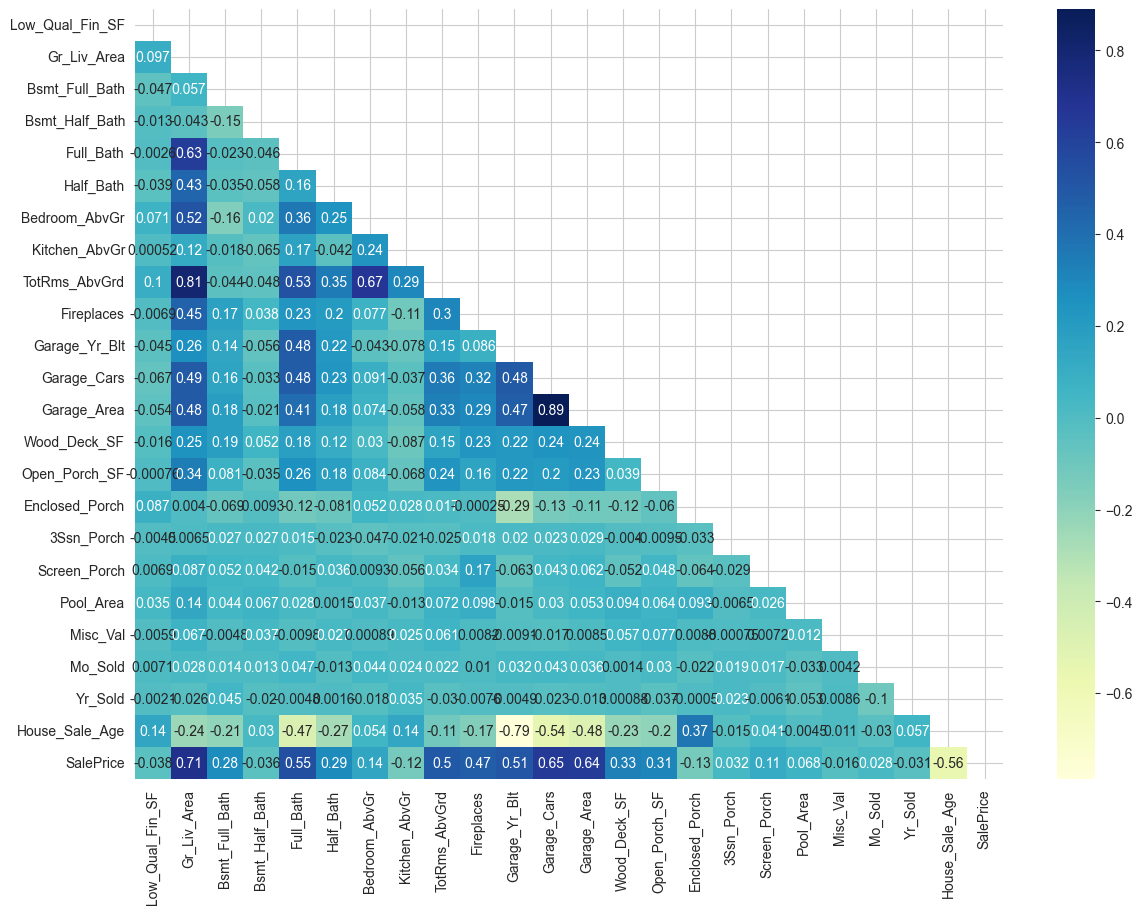

In [91]:
# Correlation matrix
corr_matrix = numerical_cols_1.corr()

plt.figure(figsize=(14,10))
mask = np.triu(np.ones_like(corr_matrix))
sns.heatmap(corr_matrix,
            annot=True,
            mask=mask,
            cmap="YlGnBu");

In [92]:
# Dropping columns with a correlation of less than 0.4
columns_to_drop = corr_matrix[abs(corr_matrix["SalePrice"]) < corr_cutoff].index.tolist()
print("Columns to drop:")
print(columns_to_drop)

# Drop columns
numerical_cols_1.drop(columns=columns_to_drop, inplace=True)

numerical_cols_1.head()

Columns to drop:
['Low_Qual_Fin_SF', 'Bsmt_Full_Bath', 'Bsmt_Half_Bath', 'Half_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr', 'Wood_Deck_SF', 'Open_Porch_SF', 'Enclosed_Porch', '3Ssn_Porch', 'Screen_Porch', 'Pool_Area', 'Misc_Val', 'Mo_Sold', 'Yr_Sold']


,Gr_Liv_Area,Full_Bath,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,House_Sale_Age,SalePrice
0,1656,1,7,2,1960.0,2.0,528.0,50,215000
1,896,1,5,0,1961.0,1.0,730.0,49,105000
2,1329,1,6,0,1958.0,1.0,312.0,52,172000
3,2110,2,8,2,1968.0,2.0,522.0,42,244000
4,1629,2,6,1,1997.0,2.0,482.0,13,189900


In [93]:
# Joining both dfs

df_updated = pd.concat([numerical_cols, numerical_cols_1], axis=1)
df_updated.head()

,Overall_Qual,Year_Built,Year_Remod/Add,Mas_Vnr_Area,BsmtFin_SF_1,Total_Bsmt_SF,1st_Flr_SF,Gr_Liv_Area,Full_Bath,SalePrice,Gr_Liv_Area,Full_Bath,TotRms_AbvGrd,Fireplaces,Garage_Yr_Blt,Garage_Cars,Garage_Area,House_Sale_Age,SalePrice
0,6,1960,1960,112.0,639.0,1080.0,1656,1656,1,215000,1656,1,7,2,1960.0,2.0,528.0,50,215000
1,5,1961,1961,0.0,468.0,882.0,896,896,1,105000,896,1,5,0,1961.0,1.0,730.0,49,105000
2,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,172000,1329,1,6,0,1958.0,1.0,312.0,52,172000
3,7,1968,1968,0.0,1065.0,2110.0,2110,2110,2,244000,2110,2,8,2,1968.0,2.0,522.0,42,244000
4,5,1997,1998,0.0,791.0,928.0,928,1629,2,189900,1629,2,6,1,1997.0,2.0,482.0,13,189900


In [95]:
# Checking the categorical columns

categorical_cols = df_new.select_dtypes(include=["object"])
categorical_cols.head()

,MS_Zoning,Street,Lot_Shape,Land_Contour,Utilities,Lot_Config,Land_Slope,Neighborhood,Condition_1,Condition_2,...,Electrical,Kitchen_Qual,Functional,Garage_Type,Garage_Finish,Garage_Qual,Garage_Cond,Paved_Drive,Sale_Type,Sale_Condition
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,P,WD,Normal
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal


In [102]:
# Encoding the categorical columns
categorical_cols = pd.get_dummies(categorical_cols)

# Checking shape
categorical_cols.shape

(2930, 243)

From the above code,we can see that we have 2930 rows and 243 columns up from 37. This is mainly due to some columns having multiple categories and we have to create a column for each category.

In [103]:
# Adding SalePrice to the categorical columns
categorical_cols["SalePrice"] = df_new["SalePrice"]

# Correlation matrix
cat_corr_matrix = categorical_cols.corr()

# Columns to drop
columns_to_drop = cat_corr_matrix[abs(cat_corr_matrix["SalePrice"]) < corr_cutoff].index.tolist()

print(columns_to_drop)


['MS_Zoning_A (agr)', 'MS_Zoning_C (all)', 'MS_Zoning_FV', 'MS_Zoning_I (all)', 'MS_Zoning_RH', 'MS_Zoning_RL', 'MS_Zoning_RM', 'Street_Grvl', 'Street_Pave', 'Lot_Shape_IR1', 'Lot_Shape_IR2', 'Lot_Shape_IR3', 'Lot_Shape_Reg', 'Land_Contour_Bnk', 'Land_Contour_HLS', 'Land_Contour_Low', 'Land_Contour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'Utilities_NoSewr', 'Lot_Config_Corner', 'Lot_Config_CulDSac', 'Lot_Config_FR2', 'Lot_Config_FR3', 'Lot_Config_Inside', 'Land_Slope_Gtl', 'Land_Slope_Mod', 'Land_Slope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_Greens', 'Neighborhood_GrnHill', 'Neighborhood_IDOTRR', 'Neighborhood_Landmrk', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_OldTown', 'Neigh

ValueError: Item wrong length 244 instead of 2930.

## References

BecomingHuman.ai (2020) Outlier detection in real estate data, Medium. Available at: https://becominghuman.ai/outlier-detection-in-real-estate-data-4e7375e2c8ba (Accessed: 05 November 2023).

Kumar, A. (2023) Python - replace missing values with mean, median &amp; mode, Analytics Yogi. Available at: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/ (Accessed: 11 November 2023).

Smart Vision (2020) CRISP DM methodology, Smart Vision Europe. Available at: https://www.sv-europe.com/crisp-dm-methodology/ (Accessed: 17 November 2023). 

Whitegates (2022) 7 things your estate agent will look for when valuing your home, Whitegates. Available at: https://www.whitegates.co.uk/news/seven-things-your-estate-agent-will-look-for-when-valuing-your-home-8228 (Accessed: 15 November 2023). 

